# Define an oscillatory function in Python to describe the intra- and inter-day variations in the tide.

Using the scipy library, fit the oscillatory function to the data assuming the root mean squared experimental error on the height of the tide is 0.25 ft. Document these steps in the Jupyter notebook, and graph both the model and the data on the same plot. Label the data, provide sufficient labeling of the axes to provide clarity, and have the notebook save the figure to a PDF.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import scipy as sp
%matplotlib inline

In [2]:
#This function attempts to model the tides as a composite of 3 simple cos() functions, with terms for frequency & phaseshift for each
#The default values produce a relatively good approximation of the given data's overall shape
def oscilloscope(time, amplitude=3, daily=1/120, day_shift=0, diurnal=1/4, diurnal_shift=0, semidiurnal=1/120, semi_shift=np.pi/2, avg_height=2.4783):
    dailycycle = np.cos(time*daily+day_shift)
    diurnalcycle = np.cos(time*diurnal+diurnal_shift)
    semicycle = np.cos(time*semidiurnal+semi_shift)
    return(amplitude*dailycycle*(diurnalcycle+semicycle))+avg_height


In [3]:
from astropy.io import ascii #ascii plain text i/o
given_data = ascii.read('ASTR19_F23_group_project_data.txt') #read the data in a new table

#Here, I take the astropy ascii function and use it to put the time and tide data into two 1-D arrays
given_time = [] #given_time is in hours
given_tide = [] #given_tide is in feet
for n in given_data:
    hoursmin = (n[1]).split(":") #This and the next few lines seperate the hours and the minutes
    hours = float(hoursmin[0])
    min = float(hoursmin[1])
    day = float(n[0])-1
    given_time = given_time+[(day*24)+hours+(min/60)] #this line takes the day and converts it to hours since t=0, before combining it with the time of day
    given_tide = given_tide+[float(n[2])]

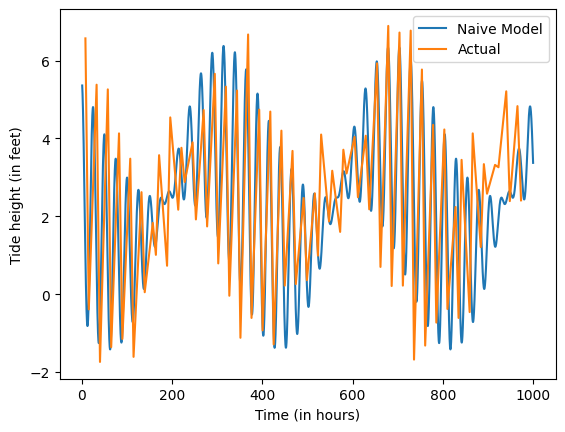

In [4]:
#Generating a time array, then calling the oscilloscope function to get a tide model using the default values
#Convieniently, total time ellapsed of the actual data is pretty close to 1000 hours
timesamples = np.linspace(1, 1000, 20000)
tidesamples = oscilloscope(timesamples)

#Plotting that, plus the actual data, and labeling everything
plt.plot(timesamples, tidesamples, label=('Naive Model'))
plt.plot(given_time, given_tide, label='Actual')
plt.xlabel('Time (in hours)')
plt.ylabel('Tide height (in feet)')
plt.legend()
plt.savefig('Naive_Model.pdf', bbox_inches = "tight", pad_inches = 0, dpi=400)

In [5]:
#Getting better optimized parameters for oscilloscope()
sp.optimize.curve_fit(oscilloscope, given_time, given_tide, [3, 1/120, 0, 1/4, 0, 1/120, np.pi/2, 2.4783], 0.25)

(array([ 3.60120674,  0.00895659, -0.23109874,  0.25353642, -1.43068785,
         0.0083018 ,  1.45622578,  2.70629831]),
 array([[ 6.25497013e-02, -5.56239220e-06,  7.12817621e-03,
         -2.35013598e-05,  4.37635553e-02,  1.80543925e-05,
         -3.29913494e-02, -9.29394833e-03],
        [-5.56239220e-06,  2.06283717e-08, -1.00266903e-05,
          1.71208171e-08, -1.46285932e-05, -4.45753830e-09,
          5.83547595e-06, -2.54739396e-06],
        [ 7.12817621e-03, -1.00266903e-05,  8.57601093e-03,
         -1.27937207e-05,  1.24585253e-02,  5.61879283e-06,
         -1.01821501e-02, -1.15651930e-02],
        [-2.35013598e-05,  1.71208171e-08, -1.27937207e-05,
          3.29277490e-07, -2.26701502e-04, -1.97985142e-07,
          1.39694498e-04, -9.64729618e-07],
        [ 4.37635553e-02, -1.46285932e-05,  1.24585253e-02,
         -2.26701502e-04,  1.85644766e-01,  1.40758569e-04,
         -1.17050524e-01, -1.21434941e-03],
        [ 1.80543925e-05, -4.45753830e-09,  5.61879283e-06

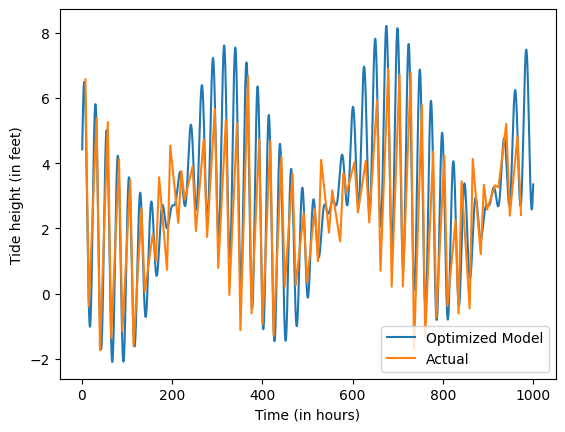

In [6]:
#Calling oscillscope() with those optimized parameters over a timescale
opt_par = [ 3.60120674,  0.00895659, -0.23109874,  0.25353642, -1.43068785, 0.0083018 ,  1.45622578,  2.70629831]
optimized_model = oscilloscope(timesamples, opt_par[0], opt_par[1], opt_par[2], opt_par[3], opt_par[4], opt_par[5], opt_par[6], opt_par[7])

#Plotting that, plus the actual data, plus labels
plt.plot(timesamples, optimized_model, label=('Optimized Model'))
plt.plot(given_time, given_tide, label='Actual')
plt.xlabel('Time (in hours)')
plt.ylabel('Tide height (in feet)')
plt.legend()
plt.savefig('Optimized_Model.pdf', bbox_inches = "tight", pad_inches = 0, dpi=400)